In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform
import skimage.color
import os

print(tf.__version__)

2.7.0


# Create the dataset

In [2]:
# images = np.ndarray((0, 16, 16))
# labels = np.ndarray((0,))

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

# for i in np.arange(0, 10):
#     file_names = os.listdir(f'../img/digits-dataset/{i}')
#     for file in file_names[:500]:
#
#         case = skimage.transform.resize(plt.imread(f'../img/digits-dataset/{i}/{file}'), (16, 16))
#         images = np.concatenate((images, [case]))
#         labels = np.append(labels, i)

In [3]:
# limit = int(len(images)*0.7)
# np.random.shuffle(images)

# train_labels, train_images = labels[:limit], images[:limit] / 255.0
# test_labels, test_images = labels[limit:], images[limit:] / 255.0

C:\Users\km169\AppData\Local\Temp/ipykernel_9984/1582482101.py:13: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  case = skimage.color.rgb2gray(case)


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1

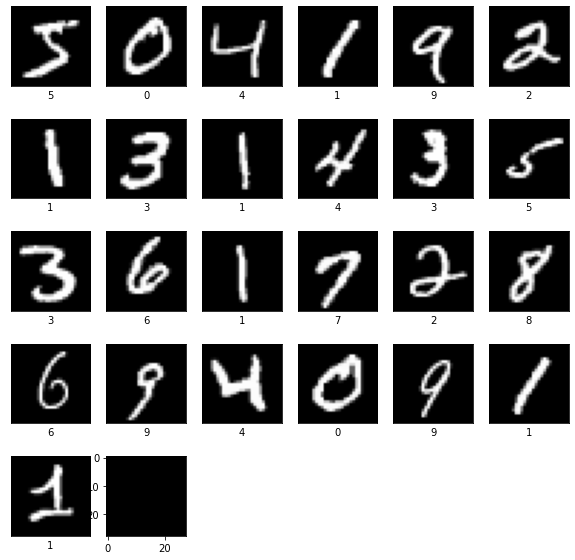

In [48]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.gray)
    plt.xlabel(train_labels[i])
plt.subplot(5, 6, 26)

case = plt.imread('../img/boxes/0.png') / 255.0
case = skimage.transform.resize(case, (28, 28))
case = skimage.color.rgb2gray(case)
case = np.where(case < .5, np.ones((28, 28)), 0)
print(case)

plt.imshow(case, cmap=plt.cm.gray)
plt.show()

In [49]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1349/1875 [====================>.........] - ETA: 14s - loss: 0.1680 - accuracy: 0.9489

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                        

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.9879
Test accuracy: 0.9879000186920166


C:\Users\km169\AppData\Local\Temp/ipykernel_9984/462108676.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  case = skimage.color.rgb2gray(case)


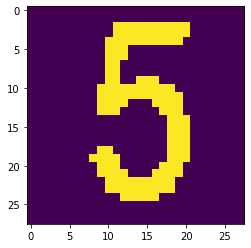

[[ -7.646175  -15.578171   -9.829989  -10.026884  -25.649693    7.166242
   -7.6703334 -13.080275  -13.383018   -8.757422 ]]


In [40]:
case = plt.imread('../img/boxes/12.png')
case = skimage.transform.resize(case, (28, 28))
case = skimage.color.rgb2gray(case)
case = np.where(case < .75, np.ones((28, 28)), 0)
case = np.array([case])

plt.imshow(case[0])
plt.show()


print(model.predict(case))